In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
TARGET = ["Normal", "Fraud"]

In [2]:
data = pd.read_csv(r"C:\Users\ASUS\Desktop\Project\fraud_detection.csv")

In [3]:
data.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY
0,0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,...,1,1,0,1,1,0,Laborers,1.0,2,2
1,1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,...,1,1,0,1,1,0,Core staff,2.0,1,1
2,2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,...,1,1,1,1,1,0,Laborers,1.0,2,2
3,3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,...,1,1,0,1,0,0,Laborers,2.0,2,2
4,4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,...,1,1,0,1,0,0,Core staff,1.0,2,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   307511 non-null  int64  
 1   SK_ID_CURR                   307511 non-null  int64  
 2   TARGET                       307511 non-null  int64  
 3   NAME_CONTRACT_TYPE           307511 non-null  object 
 4   CODE_GENDER                  307511 non-null  object 
 5   FLAG_OWN_CAR                 307511 non-null  object 
 6   FLAG_OWN_REALTY              307511 non-null  object 
 7   CNT_CHILDREN                 307511 non-null  int64  
 8   AMT_INCOME_TOTAL             307511 non-null  float64
 9   AMT_CREDIT                   307511 non-null  float64
 10  AMT_ANNUITY                  307499 non-null  float64
 11  AMT_GOODS_PRICE              307233 non-null  float64
 12  NAME_TYPE_SUITE              306219 non-null  object 
 13 

In [5]:
columns = data.columns.tolist()
columns =  [c for c in columns if c not in ["TARGET"]]
target = "TARGET"
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
print(X.shape)
print(Y.shape)

(307511, 32)
(307511,)


In [6]:
data.isnull().values.any()

True

Text(0, 0.5, 'Frequency')

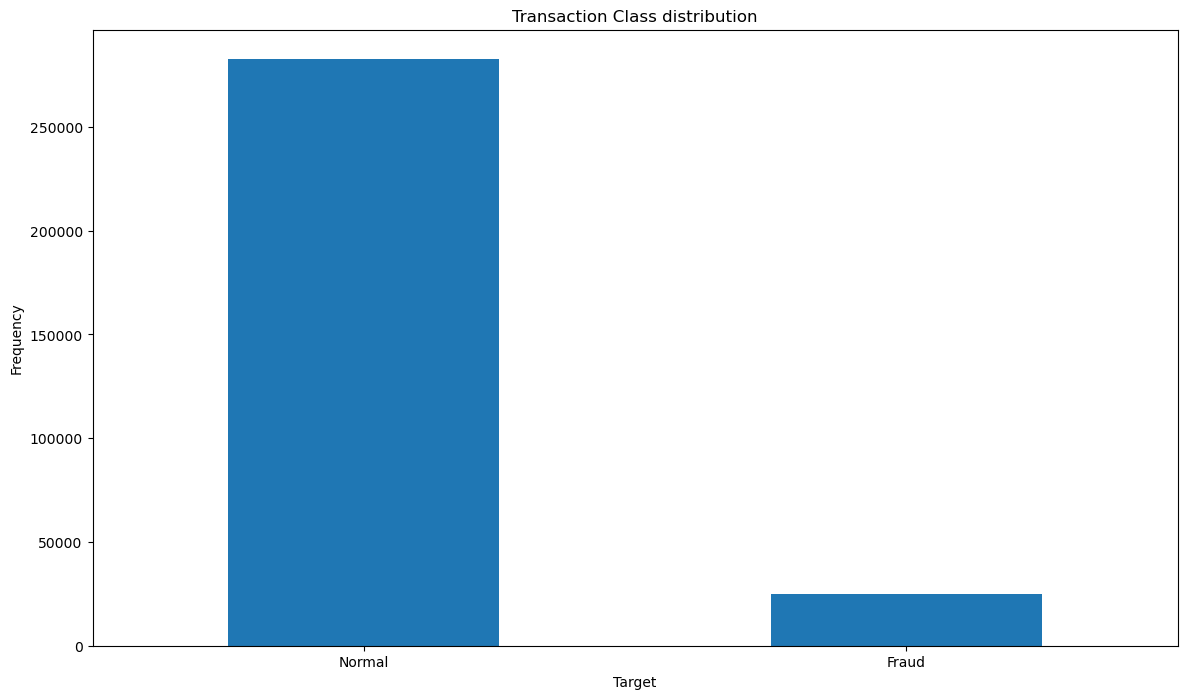

In [7]:
count_classes = pd.value_counts(data['TARGET'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class distribution")
plt.xticks(range(2), TARGET)
plt.xlabel("Target")
plt.ylabel("Frequency")

In [8]:
fraud = data[data['TARGET']==1]

normal = data[data['TARGET']==0]

In [9]:
print(fraud.shape,normal.shape)

(24825, 33) (282686, 33)


In [10]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE']

In [11]:
data = pd.get_dummies(data, columns=categorical_columns)

In [12]:
X = data.drop('TARGET', axis=1)
y = data['TARGET']

In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [14]:
X.shape

(307511, 81)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
!pip install -U scikit-learn imbalanced-learn

In [17]:
!pip install -U imblearn

In [18]:
!pip install -U imbalanced-learn

In [19]:
from imblearn.over_sampling import RandomOverSampler, ADASYN

In [20]:
def plot_resample(y_resampled, title):
    plt.figure(figsize=(4,4))
    pd.Series(y_resampled.value_counts().plot.pie(autopct="%1.1f%%", startangle=90, colors=["#FFABAB", "#BFFCC6"]))
    plt.title(title)
    plt.show()

In [21]:
adasyn = ADASYN(random_state=211)
X_adasyn, y_adasyn = adasyn.fit_resample(X_train, y_train)

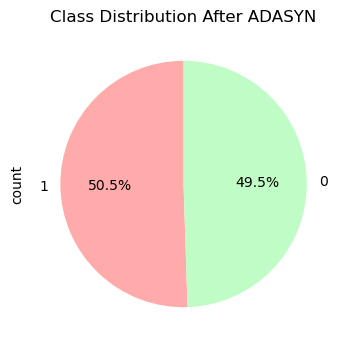

In [22]:
plot_resample(y_adasyn, 'Class Distribution After ADASYN')

In [23]:
y_train.value_counts()

TARGET
0    226132
1     19876
Name: count, dtype: int64

In [24]:
y_adasyn.value_counts()

TARGET
1    230839
0    226132
Name: count, dtype: int64

In [25]:
print("No.of Records added : ", y_adasyn.shape[0] - y_train.shape[0])

No.of Records added :  210963


In [26]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_adasyn ,y_adasyn)
accuracy = clf.score(X_test, y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.9195486399037446


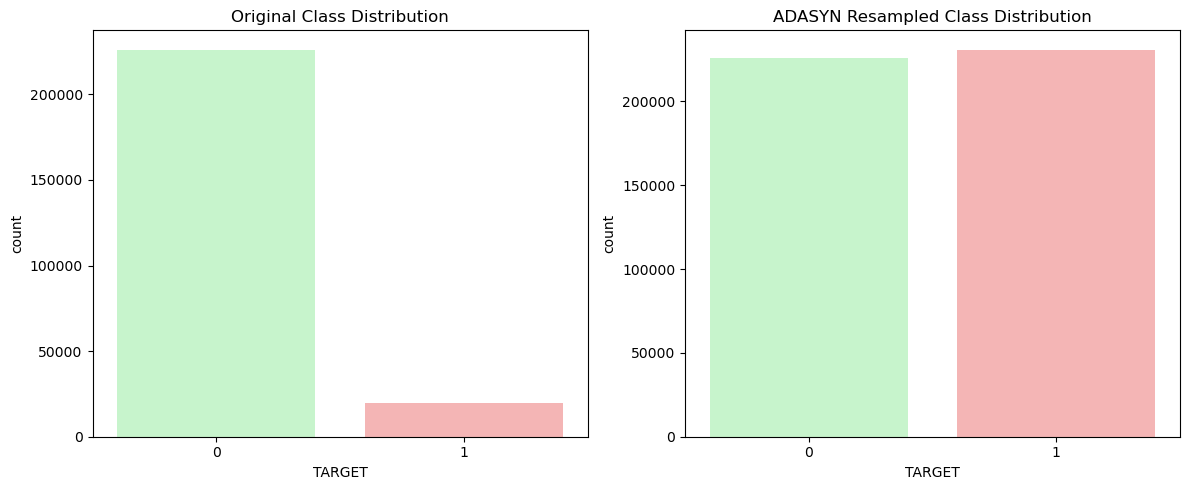

In [27]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
class_palette = {0: "#BFFCC6", 1: "#FFABAB"}
sns.countplot(x=pd.Series(y_train), palette=class_palette)
plt.title('Original Class Distribution')

# Plot class distribution after ADASYN
plt.subplot(1, 2, 2)
sns.countplot(x=pd.Series(y_adasyn), palette=class_palette)
plt.title('ADASYN Resampled Class Distribution')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()